<a href="https://colab.research.google.com/github/Laharikv/ML_projects/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 262MB/s]
100% 1.06G/1.06G [00:04<00:00, 243MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
    )
validation_ds=keras.utils.image_dataset_from_directory(
   directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 96ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 1.2409 - val_accuracy: 0.7940
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 1.2623 - val_accuracy: 0.7922
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0278 - accuracy: 0.9922 - val_loss: 1.2477 - val_accuracy: 0.7948
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 1.4970 - val_accuracy: 0.7938
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 1.3229 - val_accuracy: 0.7916
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 1.3828 - val_accuracy: 0.7940
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 1.4431 - val_accuracy:

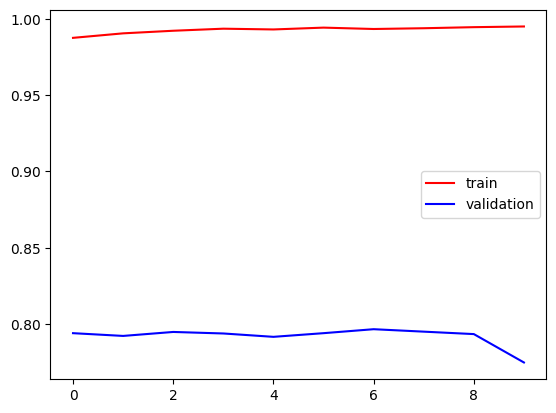

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

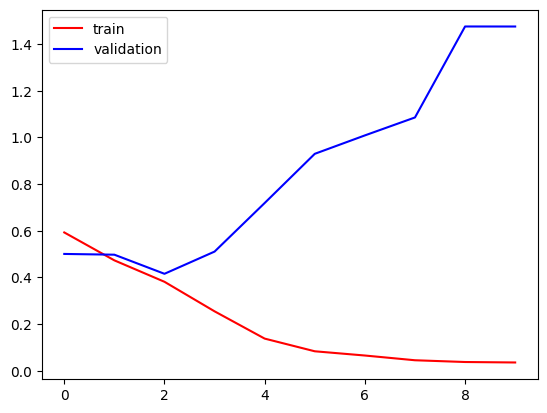

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

TypeError: Image data of dtype object cannot be converted to float

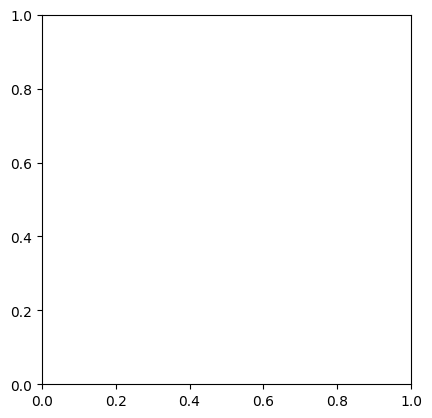

In [ ]:
import cv2
test_img=cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(2500, 2392, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 379ms/step


array([[0.]], dtype=float32)